In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def quadratic(x):
    return -x**2+4*x+2

In [3]:
x=np.array([0.5,1.2,1.5,2.2,3])

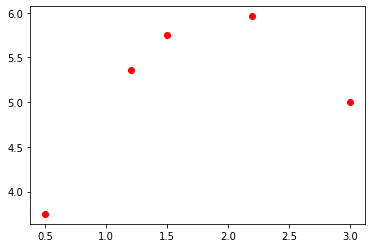

In [4]:
plt.scatter(x,quadratic(x),color='red')

In [5]:
dataset=[(1,t,quadratic(t)) for t in x]

In [6]:
dataset=pd.DataFrame(dataset)

In [7]:
dataset

,0,1,2
0,1,0.5,3.75
1,1,1.2,5.36
2,1,1.5,5.75
3,1,2.2,5.96
4,1,3.0,5.00


In [8]:
x1=dataset[1][:]

In [9]:
x2=dataset[2][:]

In [10]:
x2

0    3.75
1    5.36
2    5.75
3    5.96
4    5.00
Name: 2, dtype: float64

Text(0, 0.5, 'y')

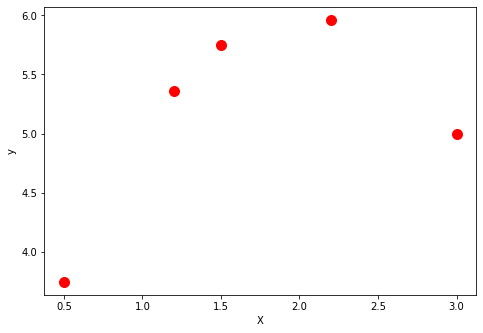

In [11]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x1,x2,color='red',s=100)
ax.set_xlabel('X')
ax.set_ylabel('y')

In [12]:
def E(dataset,order):
    n=np.shape(dataset)[0]
    
    
    if order=='linear':
        xhat=dataset[:,0:2]
        p=np.shape(xhat)[1]
        w=np.random.randn(p,1)
        yhat=np.dot(xhat,w)
        y=dataset[:,2:3]
        error=1/n*np.linalg.norm(yhat-dataset[:,1:2])
        dl=2*np.dot(np.dot(xhat.T,xhat),w)-2*np.dot(xhat.T,y)
    elif order=='quadratic':
        xhat=dataset[:,0:3]
        p=np.shape(xhat)[1]
        w=np.random.randn(p,1)
        yhat=np.dot(xhat,w)
        y=dataset[:,2:3]
        error=1/n*np.linalg.norm(yhat-dataset[:,1:2])
        dl=2*np.dot(np.dot(xhat.T,xhat),w)-2*np.dot(xhat.T,y)
      
    propagation={'L':error,'dL':dl}
    return propagation
    

In [13]:
dataset=np.array(dataset)

In [14]:
E(dataset,'quadratic')

{'L': 1.0952387521383107, 'dL': array([[ -57.14613167],
        [ -85.14087028],
        [-298.90491863]])}

In [15]:
def update(dataset,w,alpha,order):
    dl=E(dataset,order)['dL']
    new=w-alpha*dl
    return new

In [16]:
def gradient_desc(dataset,alpha,order,steps):
    if order=='linear':
        p=np.shape(dataset)[1]-1
    else:
        p=np.shape(dataset)[1]
    w=np.random.randn(p,1)
    for i in range(steps):
       w=update(dataset,w,alpha,order)
    final=E(dataset,order)
    return w

In [17]:
gradient_desc(dataset,0.00001,'linear',2000)

array([[1.04838757],
       [2.93174251]])

In [18]:
gradient_desc(dataset,0.0000001,'quadratic',2000)

array([[-0.04024378],
       [ 0.61993202],
       [-0.11071179]])

In [19]:
def plot_data(dataset,alpha,order,steps):
    w=gradient_desc(dataset,alpha,order,steps)
    w0=w[0][0]
    w1=w[1][0]
    m1=np.min(dataset[:,0:1])-2
    m2=np.max(dataset[:,0:1])+2
    
    plt.xlim(0,3.5)
    plt.ylim(0,7)

    x=np.linspace(0,3.5,20)
    y=w0+w1*x
    plt.plot(x,y,'b')
    plt.scatter(dataset[:,1:2],dataset[:,2:3],color='red')
    plt.savefig('Linear.jpeg',dpi=300)
    

In [20]:
def plot_data_2(dataset,alpha,steps):
    w=gradient_desc(dataset,alpha,'quadratic',steps)
    w0=w[0][0]
    w1=w[1][0]
    w2=w[2][0]
   
    plt.xlim(0,3.5)
    plt.ylim(0,7)

    x=np.linspace(0,3.5,20)
    y=w0+w1*x+w2*x**2
    plt.plot(x,y,'b')
    plt.scatter(dataset[:,1:2],dataset[:,2:3],color='red')
    plt.savefig('Quadratic.jpeg',dpi=300)

In [21]:
gradient_desc(dataset,0.0001,'quadratic',500)

array([[ 0.55387849],
       [ 2.4521436 ],
       [15.38291046]])

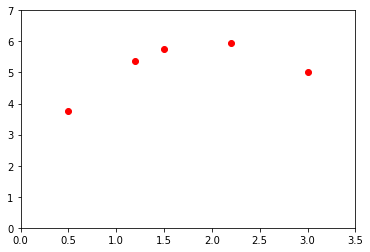

In [67]:
plot_data_2(dataset,0.00000000001,2000000)

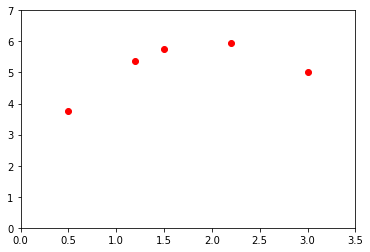

In [49]:
plot_data(dataset,0.00001,'linear',2000)

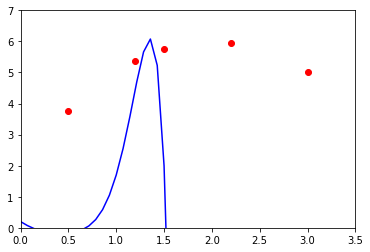

In [86]:
dataset

array([[1.  , 0.5 , 3.75],
       [1.  , 1.2 , 5.36],
       [1.  , 1.5 , 5.75],
       [1.  , 2.2 , 5.96],
       [1.  , 3.  , 5.  ]])

In [156]:
def f(x):
    return [1,x,x**2,x**3,x**4,x**5]

In [157]:
a=np.array([f(0.5),f(1.2),f(1.5),f(2.2),f(3),f(3.5)])

In [158]:
a

array([[1.0000000e+00, 5.0000000e-01, 2.5000000e-01, 1.2500000e-01,
        6.2500000e-02, 3.1250000e-02],
       [1.0000000e+00, 1.2000000e+00, 1.4400000e+00, 1.7280000e+00,
        2.0736000e+00, 2.4883200e+00],
       [1.0000000e+00, 1.5000000e+00, 2.2500000e+00, 3.3750000e+00,
        5.0625000e+00, 7.5937500e+00],
       [1.0000000e+00, 2.2000000e+00, 4.8400000e+00, 1.0648000e+01,
        2.3425600e+01, 5.1536320e+01],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01,
        8.1000000e+01, 2.4300000e+02],
       [1.0000000e+00, 3.5000000e+00, 1.2250000e+01, 4.2875000e+01,
        1.5006250e+02, 5.2521875e+02]])

In [159]:
b=np.array([3.75,5.36,5.75,5.96,5,6])

In [160]:
x2=np.linalg.solve(a,b)

In [161]:
x2

array([  0.51003344,  10.38879599, -10.63210702,   6.61956522,
        -2.10702341,   0.25083612])

In [162]:
w

1.9999999999999925

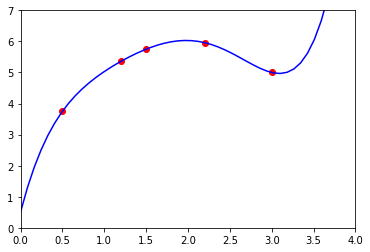

In [165]:

plt.xlim(0,4)
plt.ylim(0,7)

x=np.linspace(0,4,50)
y=x2[0]+x2[1]*x+x2[2]*x**2+x2[3]*x**3+x2[4]*x**4+x2[5]*x**5
plt.plot(x,y,'b')
plt.scatter(dataset[:,1:2],dataset[:,2:3],color='red')
plt.savefig('Quadratic.jpeg',dpi=300)

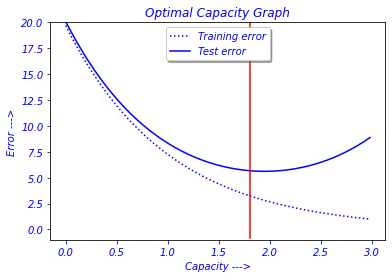

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as text

a = np.arange(0, 3, .02)
b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

fig, ax = plt.subplots()
plt.plot( a, d, 'k:', a, 0.4*c + d, 'k')

plt.legend(('Training error', 'Test error'),
           loc='upper center', shadow=True)
plt.ylim([-1, 20])
plt.grid(False)
plt.xlabel('Capacity --->')
plt.ylabel('Error --->')
plt.title('Optimal Capacity Graph')


# match on arbitrary function
def myfunc(x):
    return hasattr(x, 'set_color') and not hasattr(x, 'set_facecolor')


for o in fig.findobj(myfunc):
    o.set_color('blue')
    
plt.plot([1.8,1.8],[-0.8,20],c='red')



# match on class instances
for o in fig.findobj(text.Text):
    o.set_fontstyle('italic')

plt.savefig('Overfitting.jpeg',dpi=300)
plt.show()

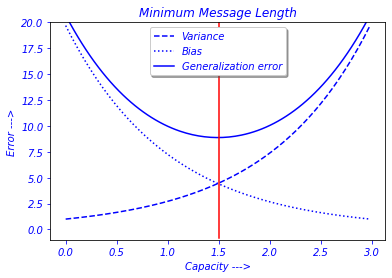

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as text

a = np.arange(0, 3, .02)
b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

fig, ax = plt.subplots()
plt.plot(a, c, 'k--', a, d, 'k:', a, c + d, 'k')
plt.legend(('Variance', 'Bias', 'Generalization error'),
           loc='upper center', shadow=True)
plt.ylim([-1, 20])
plt.grid(False)
plt.xlabel('Capacity --->')
plt.ylabel('Error --->')
plt.title('Minimum Message Length')


# match on arbitrary function
def myfunc(x):
    return hasattr(x, 'set_color') and not hasattr(x, 'set_facecolor')


for o in fig.findobj(myfunc):
    o.set_color('blue')
plt.plot([1.5,1.5],[-0.8,20],c='red')

# match on class instances
for o in fig.findobj(text.Text):
    o.set_fontstyle('italic')

plt.savefig('Bias.jpeg',dpi=300)
plt.show()

